В качестве набора данных мы будем использовать набор данных для предсказания удовлетворенности пассажиров услугами авиакомпании - https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction.

Датасет состоит из двух файлов: train.csv и test.csv. Было выбрано первые 10 тысяч строк для повышения производительности.

Будем рассматривать задачу классификации по признаку `satisfaction`.

In [1]:
target = "satisfaction"

# Загрузка и обработка данных

In [2]:
# https://github.com/ugapanyuk/ml_course_2021/wiki/TMO_KURS

In [3]:
import pandas as pd
data = pd.read_csv("satisfaction.csv").iloc[: , 1:]
data.drop_duplicates();

In [4]:
data.shape

(9999, 24)

In [5]:
data

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,14970,Female,Loyal Customer,42,Business travel,Eco,927,5,3,3,...,5,5,5,5,1,5,4,48,84.0,satisfied
9995,53434,Female,Loyal Customer,20,Business travel,Business,2288,4,4,4,...,5,3,5,5,2,2,5,0,0.0,satisfied
9996,55197,Female,Loyal Customer,19,Personal Travel,Eco Plus,1635,2,5,2,...,1,5,2,3,5,5,1,0,27.0,neutral or dissatisfied
9997,42997,Female,Loyal Customer,52,Business travel,Business,192,1,1,1,...,2,5,3,4,3,3,3,131,120.0,neutral or dissatisfied


In [6]:
# Число пропусков
data.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             30
satisfaction                          0
dtype: int64

In [7]:
# Удаляем строки с пропусками
data.dropna(axis=0, how='any', inplace=True)
data.shape

(9969, 24)

In [8]:
# Число уникальных значений и типы
for col in data.columns:
  print(f"{col} - {len(data[col].unique())} - {data.dtypes[col]}")

id - 9969 - int64
Gender - 2 - object
Customer Type - 2 - object
Age - 75 - int64
Type of Travel - 2 - object
Class - 3 - object
Flight Distance - 2368 - int64
Inflight wifi service - 6 - int64
Departure/Arrival time convenient - 6 - int64
Ease of Online booking - 6 - int64
Gate location - 5 - int64
Food and drink - 6 - int64
Online boarding - 6 - int64
Seat comfort - 5 - int64
Inflight entertainment - 6 - int64
On-board service - 6 - int64
Leg room service - 6 - int64
Baggage handling - 5 - int64
Checkin service - 5 - int64
Inflight service - 6 - int64
Cleanliness - 6 - int64
Departure Delay in Minutes - 238 - int64
Arrival Delay in Minutes - 244 - float64
satisfaction - 2 - object


Столбцы типа object содержат строковые значения. Число уникальных значений строковых столбцов не сильно большое, значит эти столбцы можно на данный момент не удалять из датасета, а просто закодировать.

In [9]:
# Кодируем
from sklearn.preprocessing import LabelEncoder

to_encode = [
  "Gender",
  "Customer Type",
  "Type of Travel",
  "Class",
]

for col in to_encode:
  data[col] = LabelEncoder().fit_transform(data[col])

data["satisfaction"].replace("satisfied", 1, inplace=True)
data["satisfaction"].replace("neutral or dissatisfied", 0, inplace=True)

In [10]:
# Перепроверяем типы данных
data.dtypes

id                                     int64
Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

Text(0.5, 0, 'Age')

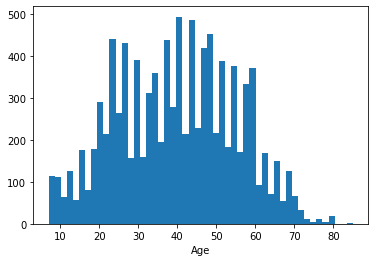

In [11]:
# Распределение столбца Age до масштабирования
import matplotlib.pyplot as plt

plt.hist(data["Age"], 50)
plt.xlabel("Age")

In [12]:
# Масштабирование
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
for col in data.columns:
  if col != target:
    data[col] = scaler.fit_transform(data[[col]])

Text(0.5, 0, 'Age')

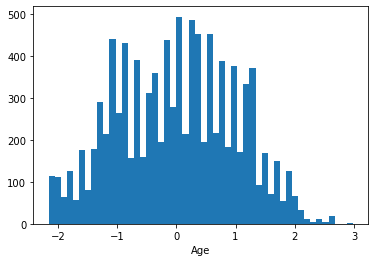

In [13]:
# Распределение столбца Age после масштабирования
plt.hist(data["Age"], 50)
plt.xlabel("Age")

Масштабирование не повлияло на распределение данных

In [14]:
data

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,-1.195676,-0.996095,-0.475604,0.807123,-0.664723,0.656637,-1.035591,1.701571,0.612599,0.171721,...,1.234635,1.263613,1.252038,1.173247,-1.036337,1.150435,1.303900,0.991530,0.806199,1
1,0.670724,-0.996095,-0.475604,-0.247081,-0.664723,-0.952511,1.673890,-1.297406,-1.340806,0.171721,...,0.482583,0.483422,0.491152,0.319268,-0.247090,0.295265,1.303900,-0.402409,-0.410025,1
2,-1.386238,1.003920,2.102589,-1.301284,-0.664723,0.656637,-1.003514,-0.547662,-1.991941,-0.538017,...,-1.021519,0.483422,-1.791504,-0.534712,-1.036337,-1.415076,-0.970833,-0.402409,-0.410025,0
3,0.350931,1.003920,-0.475604,0.280021,-0.664723,-0.952511,2.189122,-2.047150,-1.991941,-1.957494,...,-1.773571,-1.857149,-1.791504,-2.242671,-0.247090,-2.270246,0.545656,-0.402409,-0.244176,1
4,-0.737040,-0.996095,-0.475604,0.609460,-0.664723,0.656637,-0.011141,-0.547662,-0.038536,0.881460,...,-1.021519,-1.076959,-1.030619,-1.388691,0.542157,-1.415076,0.545656,-0.402409,0.142804,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-1.317121,-0.996095,-0.475604,0.148246,-0.664723,0.656637,-0.266752,1.701571,-0.038536,0.171721,...,1.234635,1.263613,1.252038,1.173247,-1.825583,1.150435,0.545656,0.935773,1.911857,1
9995,-0.298531,-0.996095,-0.475604,-1.301284,-0.664723,-0.952511,1.097511,0.951827,0.612599,0.881460,...,1.234635,-0.296768,1.252038,1.173247,-1.036337,-1.415076,1.303900,-0.402409,-0.410025,1
9996,-0.251844,-0.996095,-0.475604,-1.367172,1.504385,2.265785,0.442946,-0.547662,1.263734,-0.538017,...,-1.773571,1.263613,-1.030619,-0.534712,1.331404,1.150435,-1.729077,-0.402409,0.336295,0
9997,-0.574920,-0.996095,-0.475604,0.807123,-0.664723,-0.952511,-1.003514,-1.297406,-1.340806,-1.247756,...,-1.021519,1.263613,-0.269733,0.319268,-0.247090,-0.559905,-0.212588,3.249713,2.906949,0


# Анализ

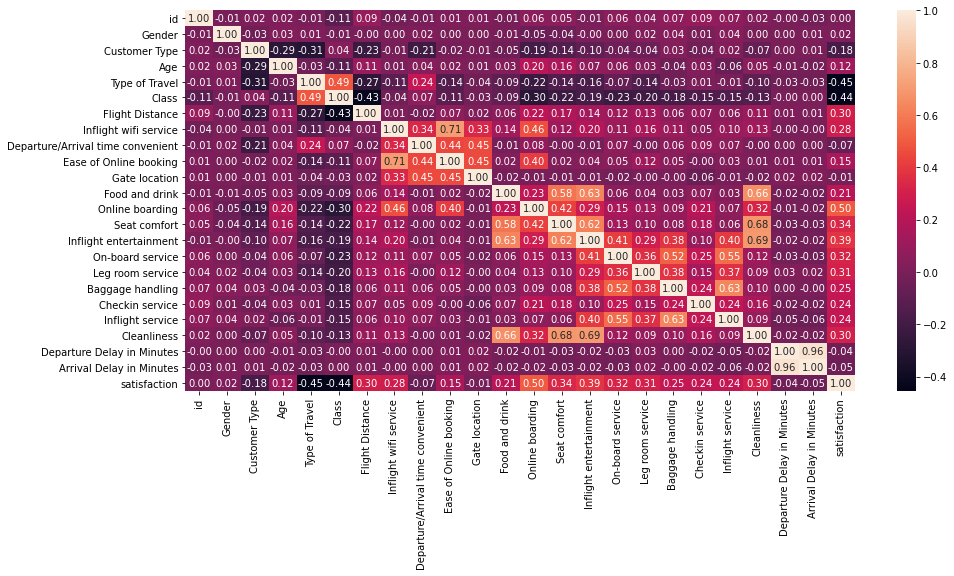

In [15]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method="pearson"), ax=ax, annot=True, fmt='.2f');

In [16]:
# Выбираем признаки, которые коррелируют с целевым
features = [
  data.columns[f[0]]
  for f in enumerate(data.corr(method="pearson")[target])
  if f[1] > 0.2 and data.columns[f[0]] != target
]

data = data[list(features + [target])]
features

['Flight Distance',
 'Inflight wifi service',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

In [17]:
for (i, count) in enumerate(data[target].value_counts()):
  print(f"Класс {i} => {count / data.shape[0] * 100}%")

Класс 0 => 56.43494833985354%
Класс 1 => 43.56505166014645%


Дисбаланс классов присутствует, но является приемлемым.

# Выбор метрик

В качестве метрик будем использовать:

#### Метрика precision:

precision=$\frac{TP}{TP+FP}$

Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

Используется функция `precision_score`.

#### Метрика recall (полнота):

recall=$\frac{TP}{TP+FN}$

Доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

Используется функция `recall_score`.

#### Метрика ROC AUC

Основана на вычислении следующих характеристик:

$TPR=\frac{TP}{TP+FN}$ - True Positive Rate, откладывается по оси ординат. Совпадает с recall.

$FPR=\frac{FP}{FP+TN}$ - False Positive Rate, откладывается по оси абсцисс. Показывает какую долю из объектов отрицательного класса алгоритм предсказал неверно.

Идеальная ROC-кривая проходит через точки (0,0)-(0,1)-(1,1), то есть через верхний левый угол графика.

Чем сильнее отклоняется кривая от верхнего левого угла графика, тем хуже качество классификации.

В качестве количественной метрики используется площадь под кривой - ROC AUC (Area Under the Receiver Operating Characteristic Curve). Чем ниже проходит кривая тем меньше ее площадь и тем хуже качество классификатора.

Для получения ROC AUC используется функция `roc_auc_score`.

# Выбор наиболее подходящих моделей для решения задачи классификации.

Будем использовать следующие модели:
- Логистическая регрессия
- Метод ближайших соседей
- Машина опорных векторов
- Решающее дерево
- Случайный лес
- Градиентный бустинг

# Разбивка данных

In [18]:
from sklearn.model_selection import train_test_split

data_X = data.loc[:, [x for x in data.columns if x != target]]
data_Y = data.loc[:, target]
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(
  data_X,
  data_Y,
  test_size=0.3,
  random_state=1
)

print(f"Размер тренировочной выборки: {data_X_train.shape[0]}")
print(f"Размер тестовой выборки: {data_X_test.shape[0]}")

Размер тренировочной выборки: 6978
Размер тестовой выборки: 2991


# Построение базового решения для выбранных моделей без подбора гиперпараметров.

Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models = {
  'LogReg': LogisticRegression(n_jobs=-1, C=1),
  'KNN': KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
  'DecisionTree': DecisionTreeClassifier(max_depth=5),
  'RandomForest': RandomForestClassifier(n_jobs=-1, n_estimators=20),
  'GradientBoost': GradientBoostingClassifier(n_estimators=20),
}

In [20]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score

scores = {
  "precision": precision_score,
  "recall": recall_score,
  "roc_auc": roc_auc_score,
}

In [21]:
for mname, model in models.items():
  print(f"Fitting {mname}..")
  model.fit(data_X_train, data_y_train)

Fitting LogReg..
Fitting KNN..
Fitting DecisionTree..
Fitting RandomForest..
Fitting GradientBoost..


In [22]:
from sklearn.metrics import roc_curve, plot_confusion_matrix

def draw_roc_curve(y_true, y_score, ax, pos_label=1, average='micro'):
  fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=pos_label)
  roc_auc_value = roc_auc_score(y_true, y_score, average=average)
  lw = 2
  ax.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
  ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  ax.set_xlim([0.0, 1.0])
  ax.set_xlim([0.0, 1.05])
  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
  ax.set_title('Receiver operating characteristic')
  ax.legend(loc="lower right")

def plots(pred, model, mname):
  fig, ax = plt.subplots(ncols=2, figsize=(10,5))    
  draw_roc_curve(data_y_test, pred, ax[0])
  plot_confusion_matrix(
    model, data_X_test, data_y_test, ax=ax[1],
    display_labels=['0','1'], 
    cmap=plt.cm.Blues, normalize='true'
  )
  fig.suptitle(mname)
  plt.show()

**LogReg**

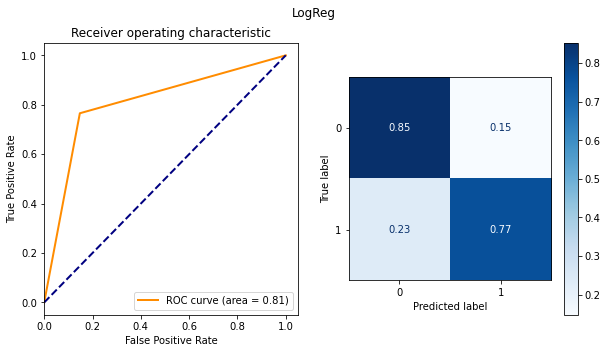

precision = 0.7913256955810147

recall = 0.765637371338084

roc_auc = 0.8090339634468198

**KNN**

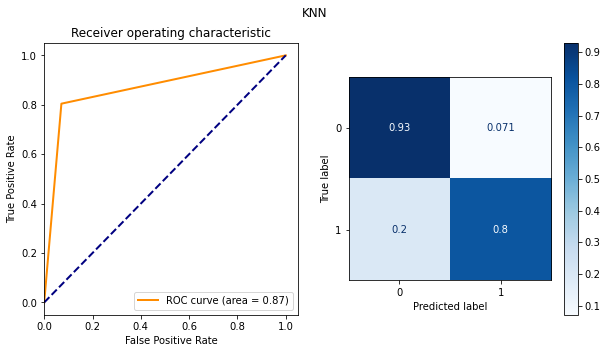

precision = 0.8920105355575065

recall = 0.8044338875692795

roc_auc = 0.8666266660068619

**DecisionTree**

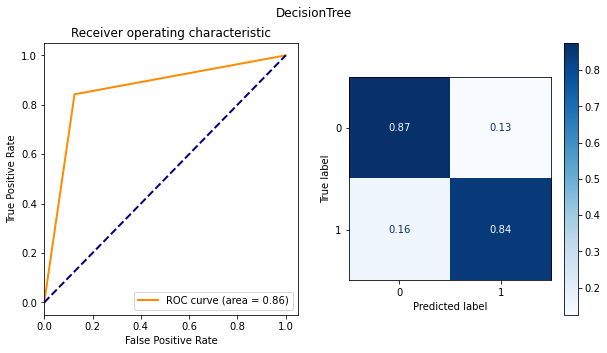

precision = 0.8306010928961749

recall = 0.8424386381631037

roc_auc = 0.8584299672297

**RandomForest**

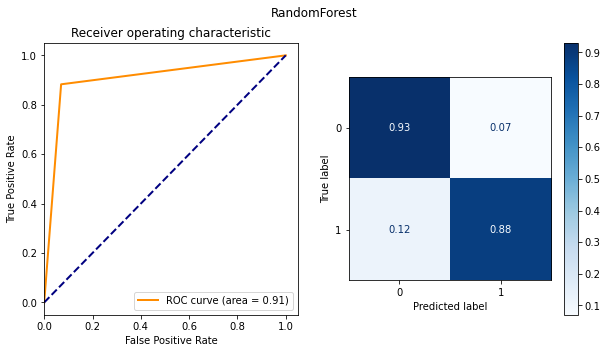

precision = 0.9021035598705501

recall = 0.882818685669042

roc_auc = 0.9063977687604469

**GradientBoost**

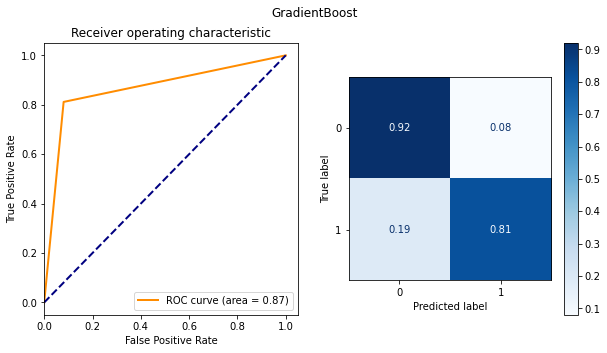

precision = 0.8805841924398625

recall = 0.8115597783056215

roc_auc = 0.8655599817454034

In [23]:
from IPython.display import Markdown

for mname, model in models.items():
  display(Markdown(f"**{mname}**"))
  pred = model.predict(data_X_test)
  plots(pred, model, mname)
  for sname, score in scores.items():
    display(Markdown(f"{sname} = {score(data_y_test, pred)}"))

# Подбор гиперпараметров

In [24]:
gs_models = { }

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

def find_best(estimator, param_grid, l):
  gs = GridSearchCV(
    estimator,
    param_grid,
    cv=KFold(n_splits=5),
    scoring="roc_auc"
  )

  gs.fit(data_X_train, data_y_train)
  display(Markdown("Качество модели в зависимости от гиперпараметра"))
  plt.plot(l, gs.cv_results_["mean_test_score"])
  return gs.best_estimator_

Качество модели в зависимости от гиперпараметра

LogisticRegression(C=0.9400000000000001, n_jobs=-1)

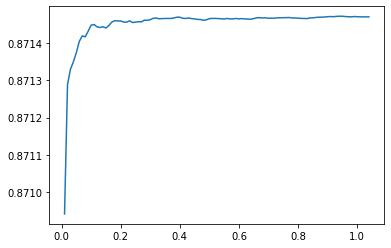

In [26]:
import numpy as np

h = np.array(np.arange(0.01, 1.05, 0.01))

gs_models["LogReg"] = find_best(
  LogisticRegression(n_jobs=-1),
  [
    {
      "C": h,
    }
  ],
  h,
)

gs_models["LogReg"]

Качество модели в зависимости от гиперпараметра

KNeighborsClassifier(n_jobs=-1, n_neighbors=15)

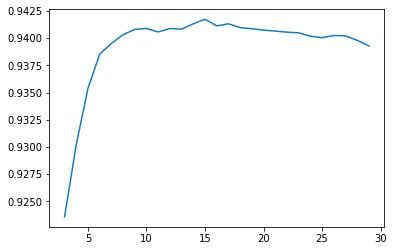

In [27]:
h = np.array(range(3, 30))

gs_models["KNN"] = find_best(
  KNeighborsClassifier(n_jobs=-1),
  [
    {
      "n_neighbors": h,
    }
  ],
  h,
)

gs_models["KNN"]

Качество модели в зависимости от гиперпараметра

DecisionTreeClassifier(max_depth=7)

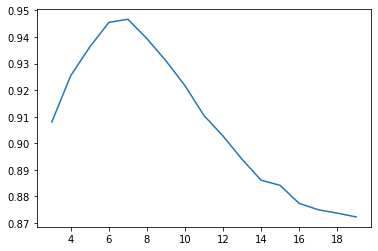

In [28]:
h = np.array(range(3, 20))

gs_models["DecisionTree"] = find_best(
  DecisionTreeClassifier(),
  [
    {
      "max_depth": h,
    }
  ],
  h,
)

gs_models["DecisionTree"]

Качество модели в зависимости от гиперпараметра

RandomForestClassifier(n_estimators=600, n_jobs=-1)

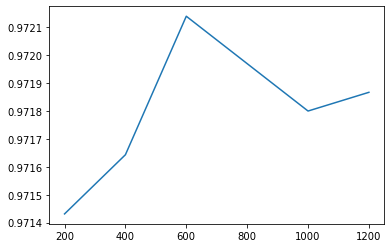

In [29]:
h = np.array([ 200, 400, 600, 1000, 1200 ])

gs_models["RandomForest"] = find_best(
  RandomForestClassifier(n_jobs=-1),
  [
    {
      "n_estimators": h,
    }
  ],
  h,
)

gs_models["RandomForest"]

Качество модели в зависимости от гиперпараметра

GradientBoostingClassifier(n_estimators=400)

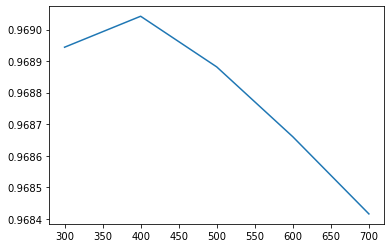

In [30]:
h = np.array([ 300, 400, 500, 600, 700 ])

gs_models["GradientBoost"] = find_best(
  GradientBoostingClassifier(),
  [
    {
      "n_estimators": h,
    }
  ],
  h,
)

gs_models["GradientBoost"]

# Сравнение качества полученных моделей с качеством моделей без подбора гиперпараметров

**LogReg**

**Старая модель**

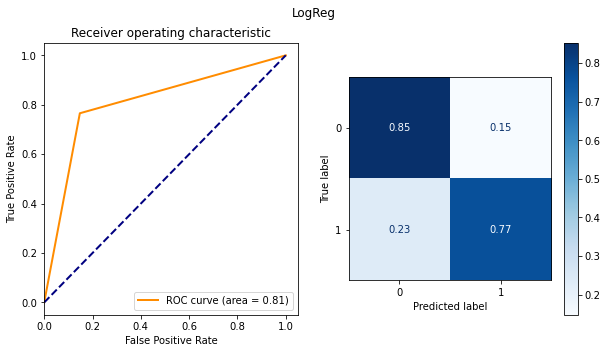

precision = 0.7913256955810147

recall = 0.765637371338084

roc_auc = 0.8090339634468198

**Новая модель**

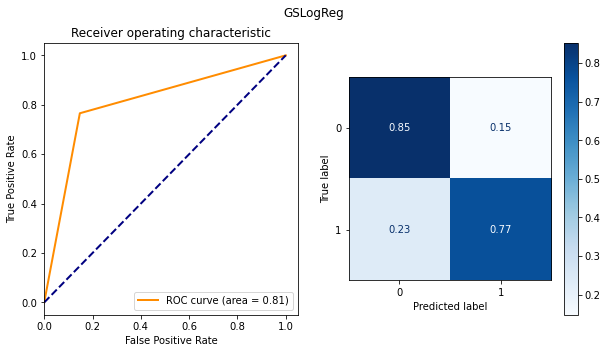

precision = 0.7913256955810147

recall = 0.765637371338084

roc_auc = 0.8090339634468198

**KNN**

**Старая модель**

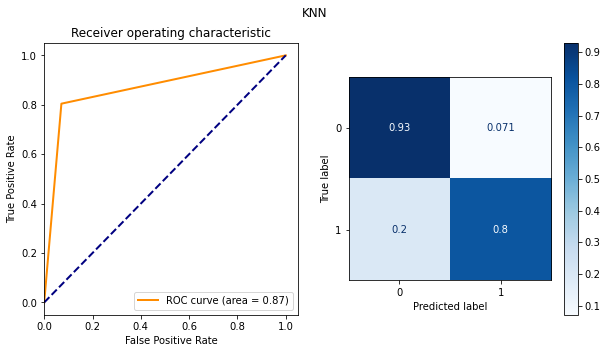

precision = 0.8920105355575065

recall = 0.8044338875692795

roc_auc = 0.8666266660068619

**Новая модель**

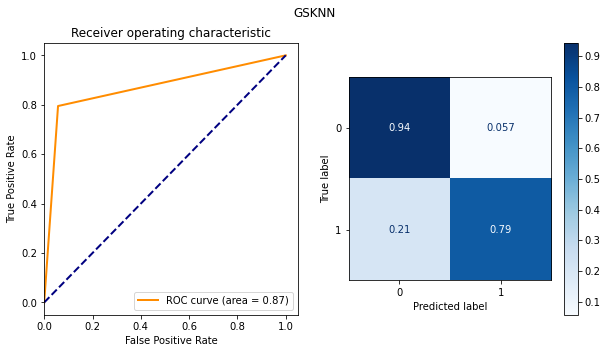

precision = 0.9102447869446962

recall = 0.7949326999208234

roc_auc = 0.8688205166270783

**DecisionTree**

**Старая модель**

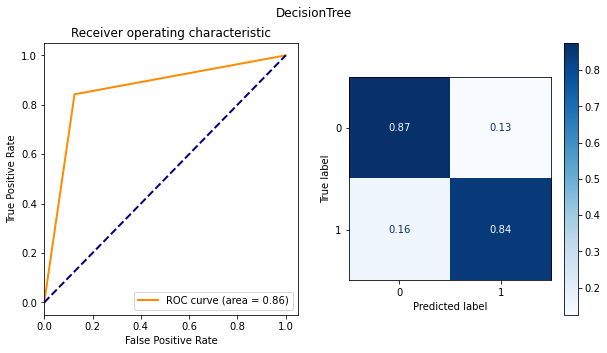

precision = 0.8306010928961749

recall = 0.8424386381631037

roc_auc = 0.8584299672297

**Новая модель**

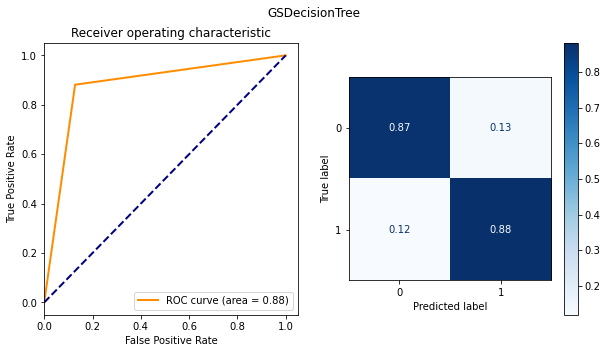

precision = 0.8343328335832084

recall = 0.8812351543942993

roc_auc = 0.8766708179378904

**RandomForest**

**Старая модель**

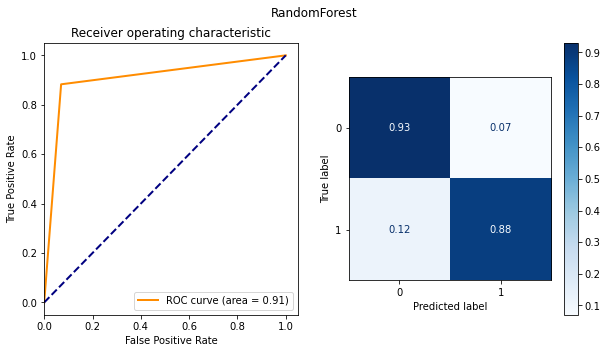

precision = 0.9021035598705501

recall = 0.882818685669042

roc_auc = 0.9063977687604469

**Новая модель**

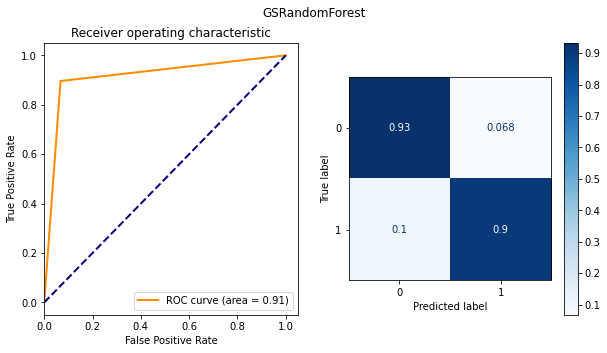

precision = 0.9063250600480385

recall = 0.8962787015043547

roc_auc = 0.9142851840855106

**GradientBoost**

**Старая модель**

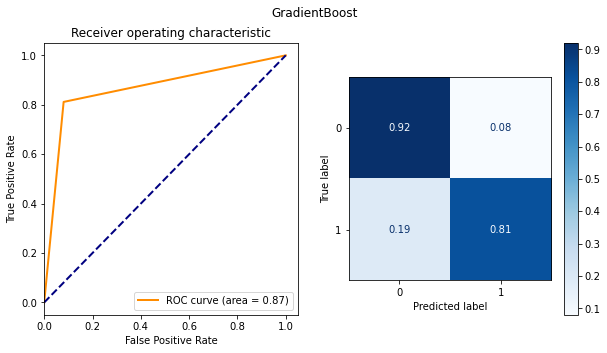

precision = 0.8805841924398625

recall = 0.8115597783056215

roc_auc = 0.8655599817454034

**Новая модель**

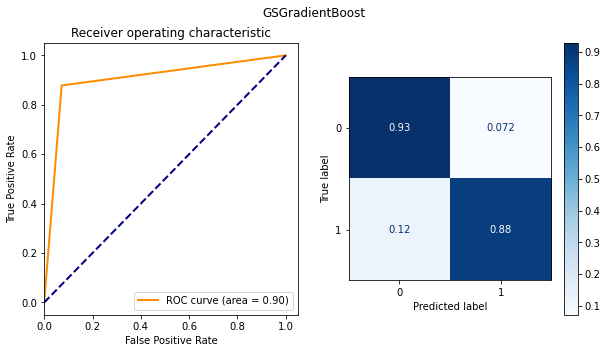

precision = 0.8987034035656402

recall = 0.8780680918448139

roc_auc = 0.9028650644409254

In [31]:
results = { }

for gsmname, gsmodel in gs_models.items():
  model = models[gsmname]

  display(Markdown(f"**{gsmname}**"))
  pred = model.predict(data_X_test)
  gspred = gsmodel.predict(data_X_test)

  display(Markdown("**Старая модель**"))
  plots(pred, model, gsmname)
  for sname, score in scores.items():
    if not sname in results:
      results[sname] = { }
    results[sname][gsmname] = score(data_y_test, pred)
    display(Markdown(f"{sname} = {results[sname][gsmname]}"))

  display(Markdown("**Новая модель**"))
  plots(gspred, gsmodel, "GS" + gsmname)
  for sname, score in scores.items():
    results[sname]["GS" + gsmname] = score(data_y_test, gspred)
    display(Markdown(f"{sname} = {results[sname]['GS' + gsmname]}"))

# Выводы о качестве построенных моделей

In [32]:
def plot(str_header, metric, figsize=(5, 5)):
  tmp = { }
  for x in gs_models.keys():
    tmp[f"GS{x}"] = results[metric][f"GS{x}"]
  for x in models.keys():
    tmp[x] = results[metric][x]
    
  tmp = sorted(tmp.items(), key=lambda item: item[1])
  array_labels = [ x[0] for x in tmp ]
  array_metric = [ x[1] for x in tmp ]

  fig, ax1 = plt.subplots(figsize=figsize)
  pos = np.arange(len(array_metric))
  rects = ax1.barh(
    pos,
    array_metric,
    align="center",
    height=0.5,
    tick_label=array_labels,
  )
  ax1.set_title(str_header)
  for a, b in zip(pos, array_metric):
    plt.text(b - 0.1, a - 0.1, str(round(b, 3)), color="white")
  plt.show()

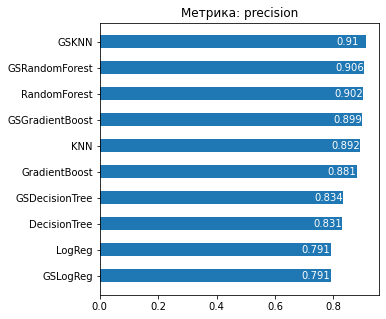

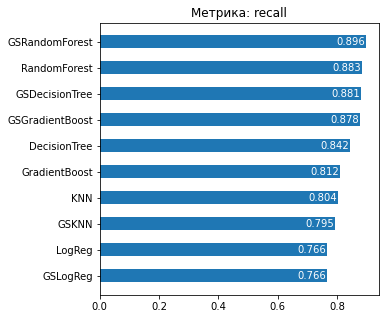

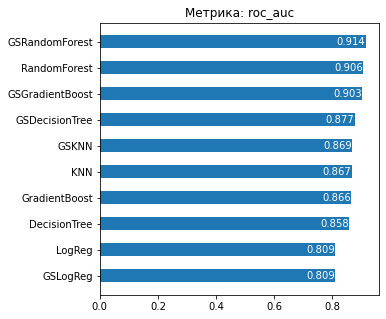

In [33]:
for metric in scores.keys():
  plot(f"Метрика: {metric}", metric)

На основании двух метрик из трех используемых, лучшей оказалась модель RandomForestClassifier после подбора гиперпараметра